In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
liquor_data = "C:\\Users\\syedc\\Desktop\\MMAI\\MBAN 6110\\Group_Project\\Iowa_Liquor_Sales.csv"
df = pd.read_csv(liquor_data)

C:\Users\syedc\AppData\Local\Temp\ipykernel_21356\2447307837.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(liquor_data)


In [5]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/04/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [6]:
df.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,1.259108e+07,1.251190e+07,1.258306e+07,1.259107e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07,1.259108e+07
mean,3.565216e+03,5.724050e+01,1.044710e+06,2.574911e+02,4.603682e+04,1.222533e+01,9.289402e+02,8.140392e+00,7.489119e+00,1.977358e+00
std,9.312721e+02,2.726983e+01,5.435094e+04,1.416175e+02,5.301684e+04,7.458673e+00,7.340448e+02,2.217891e+01,2.679149e+01,7.077822e+00
min,2.106000e+03,1.000000e+00,1.012200e+05,1.000000e+01,1.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.604000e+03,3.100000e+01,1.012210e+06,1.150000e+02,2.705600e+04,6.000000e+00,7.500000e+02,2.000000e+00,1.500000e+00,4.000000e-01
50%,3.704000e+03,6.200000e+01,1.031200e+06,2.600000e+02,3.817700e+04,1.200000e+01,7.500000e+02,4.000000e+00,3.000000e+00,7.900000e-01
75%,4.304000e+03,7.700000e+01,1.062310e+06,3.800000e+02,6.375500e+04,1.200000e+01,1.000000e+03,1.200000e+01,9.000000e+00,2.380000e+00
max,9.932000e+03,9.900000e+01,1.901200e+06,9.870000e+02,9.992750e+05,6.000000e+02,3.780000e+05,1.500000e+04,1.500000e+04,3.962580e+03


In [7]:
columns = df.columns.tolist()
columns

['Invoice/Item Number',
 'Date',
 'Store Number',
 'Store Name',
 'Address',
 'City',
 'Zip Code',
 'Store Location',
 'County Number',
 'County',
 'Category',
 'Category Name',
 'Vendor Number',
 'Vendor Name',
 'Item Number',
 'Item Description',
 'Pack',
 'Bottle Volume (ml)',
 'State Bottle Cost',
 'State Bottle Retail',
 'Bottles Sold',
 'Sale (Dollars)',
 'Volume Sold (Liters)',
 'Volume Sold (Gallons)']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12591077 entries, 0 to 12591076
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Date                   object 
 2   Store Number           int64  
 3   Store Name             object 
 4   Address                object 
 5   City                   object 
 6   Zip Code               object 
 7   Store Location         object 
 8   County Number          float64
 9   County                 object 
 10  Category               float64
 11  Category Name          object 
 12  Vendor Number          float64
 13  Vendor Name            object 
 14  Item Number            int64  
 15  Item Description       object 
 16  Pack                   int64  
 17  Bottle Volume (ml)     int64  
 18  State Bottle Cost      object 
 19  State Bottle Retail    object 
 20  Bottles Sold           int64  
 21  Sale (Dollars)         object 
 22  Volume Sold (Lit

In [9]:
#Converting it to appropriate data types
df['Date'] = pd.to_datetime(df['Date'])
df['State Bottle Cost'] = df['State Bottle Cost'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
df['State Bottle Retail'] = df['State Bottle Retail'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
df

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\syedc\AppData\Local\Temp\ipykernel_21356\1714029859.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['State Bottle Cost'] = df['State Bottle Cost'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
C:\Users\syedc\AppData\Local\Temp\ipykernel_21356\1714029859.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['State Bottle Retail'] = df['State Bottle Retail'].str.replace('[\$,]', '', regex=True).astype(float).round(2)
C:\Users\syedc\AppData\Local\Temp\ipykernel_21356\1714029859.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Sale (Dollars)'] = df['Sale (Dollars)'].str.replace('[\$,]', '', regex=True).astype(float).round(2)


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,2015-11-20,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,18.09,27.14,6,162.84,4.50,1.19
1,S29195400002,2015-11-21,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,18.09,27.14,12,325.68,9.00,2.38
2,S29050300001,2015-11-16,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,6.40,9.60,2,19.20,0.30,0.08
3,S28867700001,2015-11-04,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,35.55,53.34,3,160.02,5.25,1.39
4,S29050800001,2015-11-17,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,6.40,9.60,2,19.20,0.30,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12591072,INV-08368000074,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,73802,FrappaChata Iced Coffee Blend,12,800,8.00,12.00,3,12.00,2.40,0.63
12591073,INV-08368000075,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20375,Old Forester Statesman,6,750,27.48,41.22,2,41.22,1.50,0.39
12591074,INV-08368000076,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20372,Old Forester 1897 Whisky Row Series,6,750,24.98,37.47,2,37.47,1.50,0.39
12591075,INV-08368000077,2017-10-31,5423,Stammer Liquor Corp,615 2nd Ave,Sheldon,51201,"615 2nd Ave\nSheldon 51201\n(43.184614, -95.85...",71.0,OBRIEN,...,20369,Old Forester 1870 Whisky Row Series,6,750,22.49,33.74,2,33.74,1.50,0.39


In [10]:
df.isnull().sum()

Invoice/Item Number          0
Date                         0
Store Number                 0
Store Name                   0
Address                   2376
City                      2375
Zip Code                  2420
Store Location            2375
County Number            79178
County                   79178
Category                  8020
Category Name            16086
Vendor Number                3
Vendor Name                  1
Item Number                  0
Item Description             0
Pack                         0
Bottle Volume (ml)           0
State Bottle Cost           10
State Bottle Retail         10
Bottles Sold                 0
Sale (Dollars)              10
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

In [11]:
missing_percentage_of_data = (df.isnull().sum() / len(df)) * 100
missing_percentage_of_data

Invoice/Item Number      0.000000
Date                     0.000000
Store Number             0.000000
Store Name               0.000000
Address                  0.018871
City                     0.018863
Zip Code                 0.019220
Store Location           0.018863
County Number            0.628842
County                   0.628842
Category                 0.063696
Category Name            0.127757
Vendor Number            0.000024
Vendor Name              0.000008
Item Number              0.000000
Item Description         0.000000
Pack                     0.000000
Bottle Volume (ml)       0.000000
State Bottle Cost        0.000079
State Bottle Retail      0.000079
Bottles Sold             0.000000
Sale (Dollars)           0.000079
Volume Sold (Liters)     0.000000
Volume Sold (Gallons)    0.000000
dtype: float64

In [12]:
df["Category Name"].unique()

array([nan, 'DECANTERS & SPECIALTY PACKAGES', 'CREAM LIQUEURS',
       'MISC. IMPORTED CORDIALS & LIQUEURS',
       'PUERTO RICO & VIRGIN ISLANDS RUM', 'FLAVORED RUM',
       'PEPPERMINT SCHNAPPS', 'VODKA FLAVORED', 'VODKA 80 PROOF',
       'MISC. AMERICAN CORDIALS & LIQUEURS', 'TEQUILA', 'IRISH WHISKIES',
       'WHISKEY LIQUEUR', 'AMERICAN DRY GINS', 'CANADIAN WHISKIES',
       'IMPORTED DRY GINS', 'BLENDED WHISKIES', 'SINGLE MALT SCOTCH',
       'SPICED RUM', 'STRAIGHT BOURBON WHISKIES', 'IMPORTED VODKA - MISC',
       'IMPORTED VODKA', 'AMERICAN COCKTAILS', '100 PROOF VODKA',
       'TENNESSEE WHISKIES', 'IMPORTED GRAPE BRANDIES', 'SCOTCH WHISKIES',
       'AMERICAN ALCOHOL', 'FLAVORED GINS', 'IMPORTED SCHNAPPS',
       'APPLE SCHNAPPS', 'BLACKBERRY BRANDIES', 'APRICOT BRANDIES',
       'AMERICAN AMARETTO', 'STRAIGHT RYE WHISKIES', 'BARBADOS RUM',
       'WATERMELON SCHNAPPS', 'AMERICAN GRAPE BRANDIES',
       'CHERRY BRANDIES', 'PEACH SCHNAPPS', 'BUTTERSCOTCH SCHNAPPS',
       'MI

In [13]:
df["County"].unique()

array(['Lee', 'Page', 'Johnson', 'Tama', 'Ida', 'Black Hawk', 'Muscatine',
       'Harrison', "O'Brien", 'Polk', 'Cass', 'Clinton', 'Dubuque',
       'Crawford', 'Monona', 'Dallas', 'Scott', 'Marion', 'Henry',
       'Buchanan', 'Kossuth', 'Shelby', 'Hardin', 'Bremer', 'Linn',
       'Woodbury', 'Jasper', 'Marshall', 'Ringgold', 'Pottawattamie',
       'Washington', 'Webster', 'Howard', 'Emmet', 'Carroll', 'Story',
       'Cerro Gordo', 'Montgomery', 'Clay', 'Des Moines', 'Guthrie',
       'Jones', 'Lucas', 'Dickinson', 'Mahaska', 'Winneshiek', 'Butler',
       'Wright', 'Cedar', 'Iowa', 'Osceola', 'Winnebago', 'Grundy',
       'Louisa', 'Plymouth', 'Sioux', 'Palo Alto', 'Jackson',
       'Buena Vista', 'Floyd', 'Humboldt', 'Union', 'Clayton', 'Warren',
       'Greene', 'Wapello', 'Lyon', 'Sac', 'Madison', 'Taylor', 'Calhoun',
       'Hancock', 'Delaware', 'Fayette', 'Chickasaw', 'Jefferson',
       'Benton', 'Poweshiek', 'Cherokee', 'Franklin', 'Clarke',
       'Hamilton', 'Keokuk', '

In [14]:
df["County Number"].unique()

array([56., 73., 52., 86., 47.,  7., 70., 43., 71., 77., 15., 23., 31.,
       24., 67., 25., 82., 63., 44., 10., 55., 83., 42.,  9., 57., 97.,
       50., 64., 80., 78., 92., 94., 45., 32., 14., 85., 17., 69., 21.,
       29., 39., 53., 59., 30., 62., 96., 12., 99., 16., 48., 72., 95.,
       38., 58., 75., 84., 74., 49., 11., 34., 46., 88., 22., 91., 37.,
       90., 60., 81., 61., 87., 13., 41., 28., 33., 19., 51.,  6., 79.,
       18., 35., 20., 40., 54.,  5., nan,  8.,  3., 66., 26.,  4., 93.,
       65., 98., 76., 68.,  1., 36.,  2., 27., 89.])

In [15]:
df_cleaned = df.dropna(subset=['Address', 'City', 'Zip Code', 'Store Location', 'Category', 'Vendor Number', 'Vendor Name', 'State Bottle Cost', 'State Bottle Retail', 'Sale (Dollars)'])

In [16]:
missing_percentage_of_new_data = (df_cleaned.isnull().sum() / len(df)) * 100
missing_percentage_of_new_data

Invoice/Item Number      0.000000
Date                     0.000000
Store Number             0.000000
Store Name               0.000000
Address                  0.000000
City                     0.000000
Zip Code                 0.000000
Store Location           0.000000
County Number            0.609622
County                   0.609622
Category                 0.000000
Category Name            0.064061
Vendor Number            0.000000
Vendor Name              0.000000
Item Number              0.000000
Item Description         0.000000
Pack                     0.000000
Bottle Volume (ml)       0.000000
State Bottle Cost        0.000000
State Bottle Retail      0.000000
Bottles Sold             0.000000
Sale (Dollars)           0.000000
Volume Sold (Liters)     0.000000
Volume Sold (Gallons)    0.000000
dtype: float64

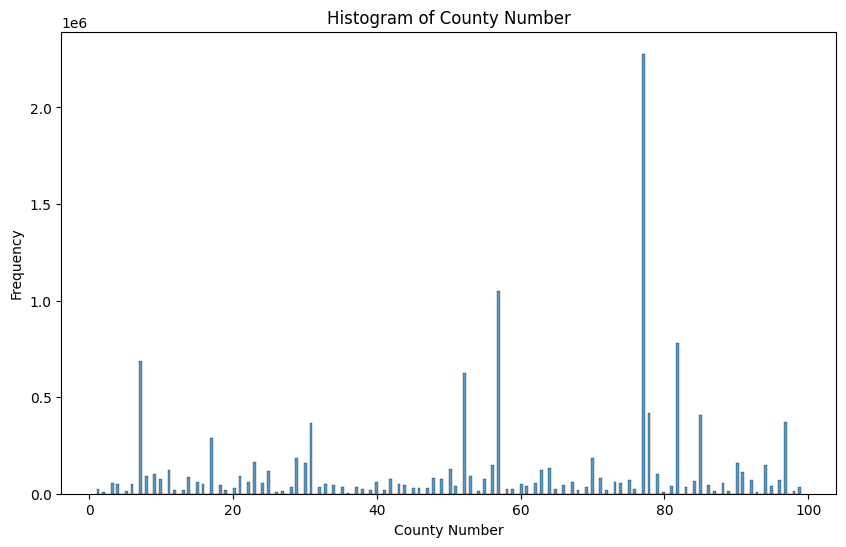

In [17]:
#Check the spread of the "County Number" column
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['County Number'])
plt.title(f'Histogram of {'County Number'}')
plt.xlabel("County Number")
plt.ylabel('Frequency')
plt.show()

In [18]:
Category_name_mode_value = df['Category Name'].mode()[0]
df_cleaned['Category Name'].fillna(Category_name_mode_value, inplace=True)

C:\Users\syedc\AppData\Local\Temp\ipykernel_21356\501077937.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Category Name'].fillna(Category_name_mode_value, inplace=True)
C:\Users\syedc\AppData\Local\Temp\ipykernel_21356\501077937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Category Name'].fillna(Category_na

In [19]:
County_mode_value = df['County'].mode()[0]
df_cleaned['County'].fillna(County_mode_value, inplace=True)

C:\Users\syedc\AppData\Local\Temp\ipykernel_21356\2391331843.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['County'].fillna(County_mode_value, inplace=True)
C:\Users\syedc\AppData\Local\Temp\ipykernel_21356\2391331843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['County'].fillna(County_mode_value, inplace=Tru

In [20]:
# Impute missing values of County Number with the median
County_Number_median_value = df_cleaned['County Number'].median()

# Impute missing values with the median
df_cleaned['County Number'].fillna(County_Number_median_value, inplace=True)

C:\Users\syedc\AppData\Local\Temp\ipykernel_21356\76090353.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['County Number'].fillna(County_Number_median_value, inplace=True)
C:\Users\syedc\AppData\Local\Temp\ipykernel_21356\76090353.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['County Number'].fillna(County_Numb

In [21]:
missing_percentage_of_new_cleaned_data = (df_cleaned.isnull().sum() / len(df)) * 100
missing_percentage_of_new_cleaned_data

Invoice/Item Number      0.0
Date                     0.0
Store Number             0.0
Store Name               0.0
Address                  0.0
City                     0.0
Zip Code                 0.0
Store Location           0.0
County Number            0.0
County                   0.0
Category                 0.0
Category Name            0.0
Vendor Number            0.0
Vendor Name              0.0
Item Number              0.0
Item Description         0.0
Pack                     0.0
Bottle Volume (ml)       0.0
State Bottle Cost        0.0
State Bottle Retail      0.0
Bottles Sold             0.0
Sale (Dollars)           0.0
Volume Sold (Liters)     0.0
Volume Sold (Gallons)    0.0
dtype: float64

In [22]:
df_cleaned['Sale (Dollars)'].describe()

count    1.258063e+07
mean     1.166003e+02
std      3.844172e+02
min      0.000000e+00
25%      2.545000e+01
50%      6.714000e+01
75%      1.327200e+02
max      2.541000e+05
Name: Sale (Dollars), dtype: float64

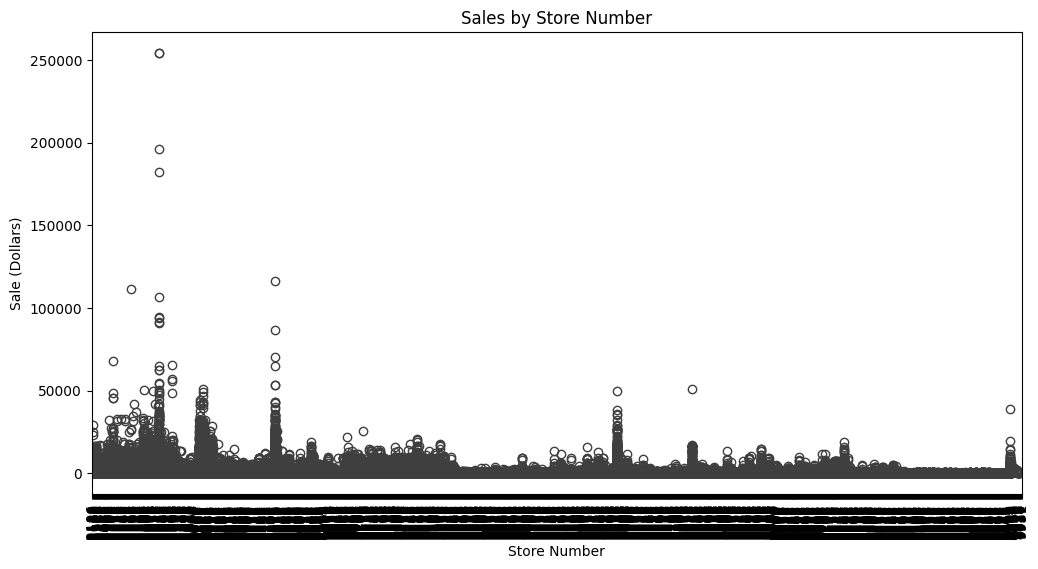

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Store Number', y='Sale (Dollars)', data=df_cleaned)
plt.title('Sales by Store Number')
plt.xticks(rotation=90)
plt.show()

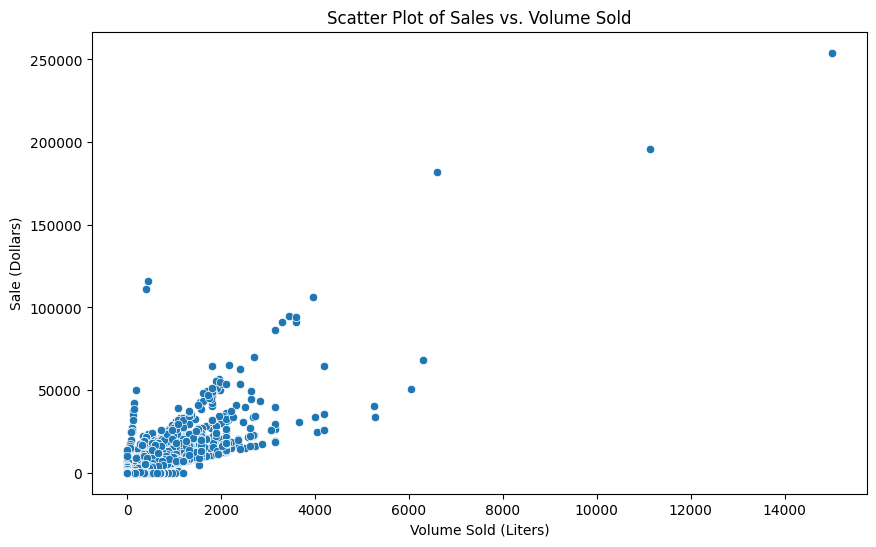

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume Sold (Liters)', y='Sale (Dollars)', data=df_cleaned)
plt.title('Scatter Plot of Sales vs. Volume Sold')
plt.show()

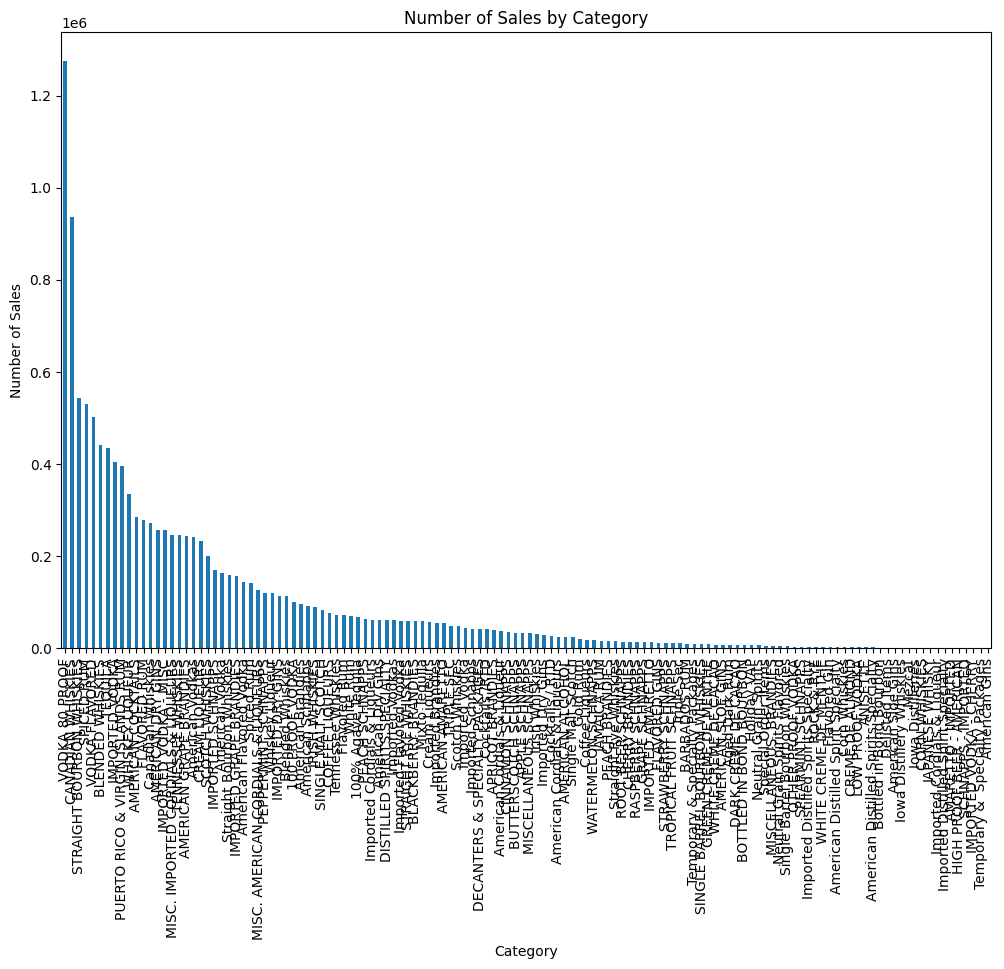

In [25]:
category_counts = df_cleaned['Category Name'].value_counts()

plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Number of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=90)
plt.show()